# Stroke Prediction

By Swapnil Malik (015016)

#Importing Liabraries

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib as plt
import seaborn as sns
import plotly.express as px

import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Display multiple outputs from a Cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

#Data Exploration

In [5]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
data.shape

(5110, 12)

In [9]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [13]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
data.describe

<bound method NDFrame.describe of          id  gender   age  ...   bmi   smoking_status stroke
0      9046    Male  67.0  ...  36.6  formerly smoked      1
1     51676  Female  61.0  ...   NaN     never smoked      1
2     31112    Male  80.0  ...  32.5     never smoked      1
3     60182  Female  49.0  ...  34.4           smokes      1
4      1665  Female  79.0  ...  24.0     never smoked      1
...     ...     ...   ...  ...   ...              ...    ...
5105  18234  Female  80.0  ...   NaN     never smoked      0
5106  44873  Female  81.0  ...  40.0     never smoked      0
5107  19723  Female  35.0  ...  30.6     never smoked      0
5108  37544    Male  51.0  ...  25.6  formerly smoked      0
5109  44679  Female  44.0  ...  26.2          Unknown      0

[5110 rows x 12 columns]>

In [7]:
data.info


<bound method DataFrame.info of          id  gender   age  ...   bmi   smoking_status stroke
0      9046    Male  67.0  ...  36.6  formerly smoked      1
1     51676  Female  61.0  ...   NaN     never smoked      1
2     31112    Male  80.0  ...  32.5     never smoked      1
3     60182  Female  49.0  ...  34.4           smokes      1
4      1665  Female  79.0  ...  24.0     never smoked      1
...     ...     ...   ...  ...   ...              ...    ...
5105  18234  Female  80.0  ...   NaN     never smoked      0
5106  44873  Female  81.0  ...  40.0     never smoked      0
5107  19723  Female  35.0  ...  30.6     never smoked      0
5108  37544    Male  51.0  ...  25.6  formerly smoked      0
5109  44679  Female  44.0  ...  26.2          Unknown      0

[5110 rows x 12 columns]>

#Data Visualization

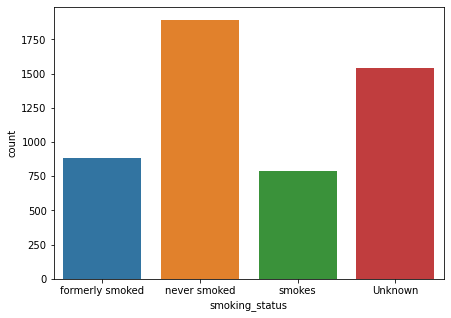

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(data["smoking_status"]);

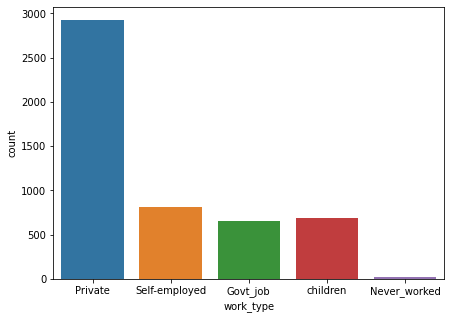

In [16]:
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(data["work_type"]);

Text(0.5, 1.0, 'Age Distribution')

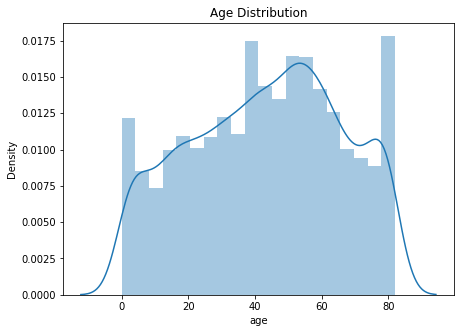

In [17]:
fig, ax = plt.subplots(figsize=(7,5))
sns.distplot(data["age"])
plt.title("Age Distribution")
plt.show()

In [ ]:
fig = px.histogram(data, x='stroke', color='stroke')
fig.update_layout(bargap=0.2)
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
fig = px.histogram(data, x='hypertension', color='stroke', barmode='group')
fig.update_layout(bargap=0.2)
fig.show()

###Handling Categorical Data

In [ ]:
numeric = [col for col in data.columns if data[col].dtypes!='object']
print('numerical',numeric)

categorical = [col for col in data.columns if data[col].dtypes=='object']
print('categorical',categorical)

numerical ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
categorical ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [ ]:
categorical_df=data[categorical]
categorical_df.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [ ]:
numeric_df= data[numeric]
numeric_df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1


###Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_df['gender'] = le.fit_transform(categorical_df['gender'])
categorical_df['ever_married'] = le.fit_transform(categorical_df['ever_married'])
categorical_df['work_type'] = le.fit_transform(categorical_df['work_type'])
categorical_df['Residence_type'] = le.fit_transform(categorical_df['Residence_type'])
categorical_df['smoking_status'] = le.fit_transform(categorical_df['smoking_status'])

categorical_df.head(10)

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,2,1,1
1,0,1,3,0,2
2,1,1,2,0,2
3,0,1,2,1,3
4,0,1,3,0,2
5,1,1,2,1,1
6,1,1,2,0,2
7,0,0,2,1,2
8,0,1,2,0,0
9,0,1,2,1,0


In [ ]:
import pandas as pd
df = pd.concat([categorical_df,numeric_df],axis=1)

In [ ]:
a= df.iloc[:,:-1]
y= df.iloc[:,[-1]]

In [ ]:
a

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,1,2,1,1,9046,67.0,0,1,228.69,36.6
1,0,1,3,0,2,51676,61.0,0,0,202.21,NaN
2,1,1,2,0,2,31112,80.0,0,1,105.92,32.5
3,0,1,2,1,3,60182,49.0,0,0,171.23,34.4
4,0,1,3,0,2,1665,79.0,1,0,174.12,24.0
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1,2,1,2,18234,80.0,1,0,83.75,NaN
5106,0,1,3,1,2,44873,81.0,0,0,125.20,40.0
5107,0,1,3,0,2,19723,35.0,0,0,82.99,30.6
5108,1,1,2,0,1,37544,51.0,0,0,166.29,25.6


In [ ]:
y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [ ]:
ss = StandardScaler()
x = ss.fit_transform(a.iloc[:,5:])

## Splitting the dataset


In [ ]:
X_train,X_test, y_train,y_test = train_test_split(
                                                  x,
                                                  y,
                                                  test_size = 0.25
                                                  )

In [ ]:
X_train.shape

(3832, 6)

In [ ]:
X_test.shape 

(1278, 6)

In [ ]:
no_of_samples_tr = X_train.shape[0]
input_features = X_train.shape[1]               
channels = 1
batch_size_tr = no_of_samples_tr    

In [ ]:
no_of_samples_test = X_test.shape[0]          
input_features = X_test.shape[1]             
channels = 1
batch_size_test = no_of_samples_test

In [ ]:
train = X_train.reshape((no_of_samples_tr  , input_features, channels))
test  = X_test.reshape(( no_of_samples_test, input_features, channels))

In [ ]:
train.shape  

(3832, 6, 1)

In [ ]:
test.shape 

(1278, 6, 1)

In [ ]:
inputs = tf.keras.Input(
                         shape = (train.shape[1],train.shape[2])  
                        )

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
x_left = layers.Conv1D(
                       filters = 64,
                       kernel_size=3,
                       activation='relu'
                       )(inputs)

In [ ]:
x_left = layers.Conv1D(
                       filters = 128,
                       kernel_size=2,
                       activation='relu'
                       )(x_left)

In [ ]:
x_rt = layers.Conv1D(
                      filters = 32,
                      kernel_size=3,
                      activation='relu'
                    )(inputs)

In [ ]:
x_rt = layers.Conv1D(
                      filters = 64,
                      kernel_size=2,
                      activation='relu'
                    )(x_rt)

In [ ]:
x = tf.keras.layers.concatenate([x_left,x_rt])

In [ ]:
x = layers.Flatten()(x)

In [ ]:
x = layers.Dense(64, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation = 'relu')(x)

In [ ]:
out = layers.Dense(1,activation = 'sigmoid')(x)

In [ ]:
model = Model(inputs = [inputs], outputs = [out])

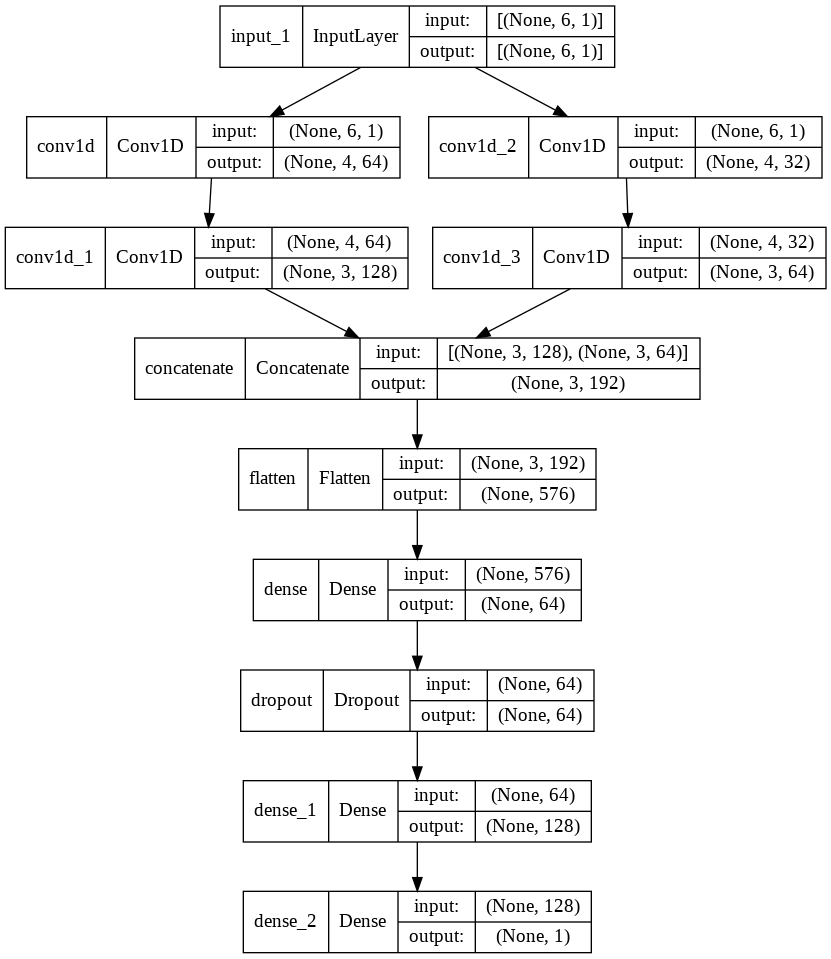

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes= True)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 1)]       0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 4, 64)        256         ['input_1[0][0]']                
                                                                                                  
 conv1d_2 (Conv1D)              (None, 4, 32)        128         ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 3, 128)       16512       ['conv1d[0][0]']                 
                                                                                              

In [ ]:
model.compile(
               optimizer = 'adam',
               loss=tf.keras.losses.BinaryCrossentropy(),
               metrics = ['accuracy']
               )

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)

In [ ]:
history = model.fit(
                    train,
                    y_train,
                    epochs = 100,
                    verbose = 1
                    )

Epoch 1/100
120/120 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.9465
Epoch 2/100
120/120 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.9465
Epoch 3/100
120/120 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.9465
Epoch 4/100
120/120 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9465
Epoch 5/100
120/120 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.9465
Epoch 6/100
120/120 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9465
Epoch 7/100
120/120 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9465
Epoch 8/100
120/120 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9465
Epoch 9/100
120/120 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.9465
Epoch 10/100
120/120 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.9465
Epoch 11/100
120/12

In [ ]:
model.evaluate(test,y_test)

40/40 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.9656


[nan, 0.9655712246894836]